In [1]:
# keep this function handy for all network visualizations in all chapters

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    import numpy as np
    import networkx as nx
    
    from IPython.display import SVG 
    from sknetwork.visualization import svg_graph 
    from sknetwork.data import Bunch 
    from sknetwork.ranking import PageRank 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

# loading data and creating networks

In [2]:
import pandas as pd

data = 'https://raw.githubusercontent.com/itsgorain/datasets/main/networks/kpop/kpop_edgelist.csv' 

df = pd.read_csv(data) 
df['source'] = df['source'].str[0:16] 
df['target'] = df['target'].str[0:16] 

df.head() 

,source,target
0,@kmg3445t,@code_kunst
1,@highgrnd,@code_kunst
2,@youngjay_93,@code_kunst
3,@sobeompark,@code_kunst
4,@justhiseung,@code_kunst


In [3]:
df.shape[0] 

1286

In [4]:
import networkx as nx

G = nx.from_pandas_edgelist(df) 

G.remove_edges_from(nx.selfloop_edges(G)) 

G.remove_node('@') # remove a junk node 

In [5]:
G

# network size and complexity

In [6]:
nx.info(G) 

'Graph with 1163 nodes and 1237 edges'

In [7]:
nx.average_clustering(G) 

0.007409464946430933

In [8]:
from networkx.classes.function import density 

density(G) 

0.001830685967059492

In [9]:
G_conn = nx.complete_graph(n=20) 

In [10]:
nx.info(G_conn) 

'Graph with 20 nodes and 190 edges'

In [11]:
nx.average_clustering(G_conn) 

1.0

In [12]:
density(G_conn) 

1.0

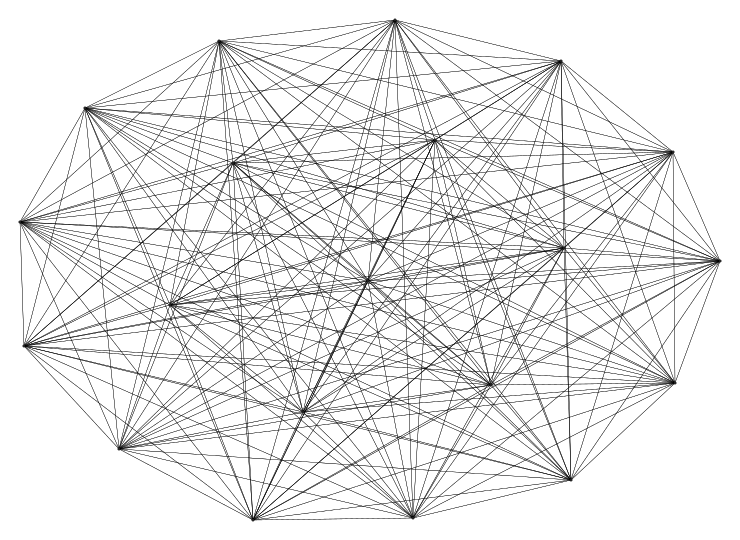

In [13]:
draw_graph(G_conn, edge_width=0.3) 

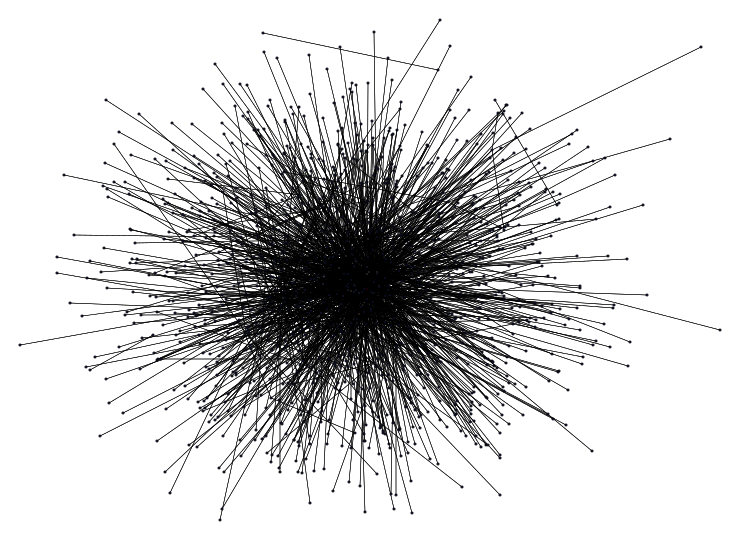

In [14]:
draw_graph(G, node_size=1, show_names=False) 

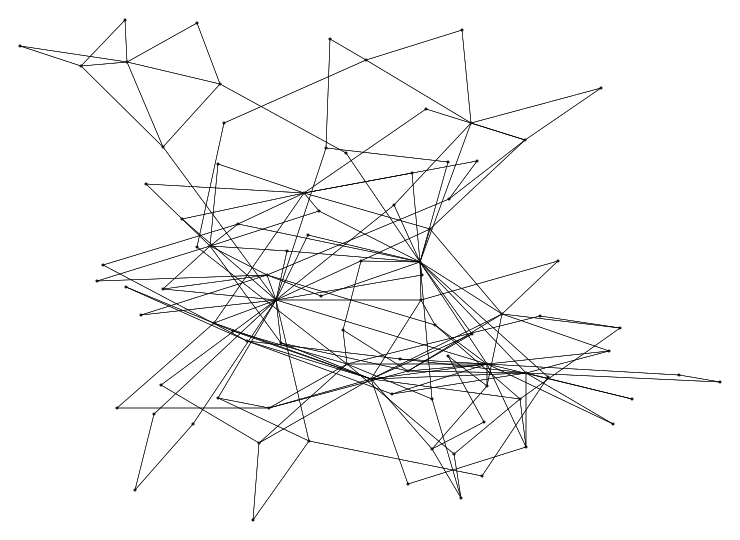

In [15]:
draw_graph(nx.k_core(G, 2), node_size=1, show_names=False) 

# important nodes

In [16]:
degrees = dict(nx.degree(G)) 

degrees

{'@kmg3445t': 1,
 '@code_kunst': 13,
 '@highgrnd': 1,
 '@youngjay_93': 1,
 '@sobeompark': 1,
 '@justhiseung': 1,
 '@hwajilla': 1,
 '@blobyblo': 4,
 '@minddonyy': 1,
 '@iuiive': 1,
 '@wgyenny': 1,
 '@wondergirls': 2,
 '@wg_lim': 2,
 '@eugenius887': 1,
 '@tukutz81': 1,
 '@krungy21': 2,
 '@haroobomkum': 86,
 '@ericjracy': 1,
 '@nolza_xxi': 1,
 '@ryubae21': 1,
 '@rebellebomzi': 1,
 '@gyulokpocjinhwa': 1,
 '@seungrisoio': 1,
 '@made_for_tttops': 1,
 '@clprv': 1,
 '@twinkle_tisa': 1,
 '@haroodidi': 1,
 '@jjy82_stop': 1,
 '@nokiov': 1,
 '@kristinekwaknok': 1,
 '@mm_3058': 1,
 '@2ne1_chisanokio': 1,
 '@izumingkki21': 1,
 '@moongyuri': 1,
 '@dyana_norazam': 1,
 '@maaa21too': 1,
 '@wereuniq': 1,
 '@bb21konnerakhi': 1,
 '@dindaacchan': 1,
 '@bomswife': 1,
 '@bomshiatus': 1,
 '@ftsuhyunouijakn': 1,
 '@harooharoobomou': 1,
 '@ddragon2ne1ouij': 1,
 '@arab_bombshells': 1,
 '@boming_21': 1,
 '@dc2ne1': 1,
 '@nicklim678': 1,
 '@2ne1kh': 1,
 '@jykim2505': 1,
 '@taempress': 1,
 '@oneofkindxi': 1,
 '@onei

In [17]:
degree_df = pd.DataFrame(degrees, index=[0]).T 
degree_df.columns = ['degrees'] 
degree_df.sort_values('degrees', inplace=True, ascending=False) 
degree_df.head() 

,degrees
@b_hundred_hyun,128
@zanelowe,94
@haroobomkum,86
@spotifykr,80
@itzailee,79


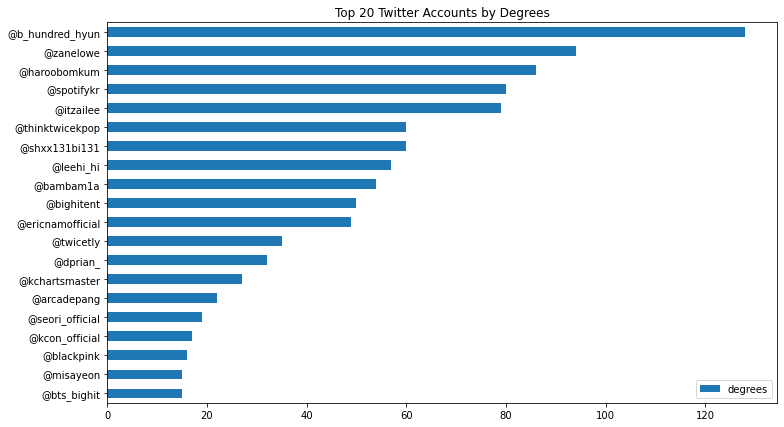

In [18]:
import matplotlib.pyplot as plt 

title = 'Top 20 Twitter Accounts by Degrees' 

_= degree_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

In [19]:
degcent = nx.degree_centrality(G) 

degcent 

{'@kmg3445t': 0.0008605851979345956,
 '@code_kunst': 0.011187607573149742,
 '@highgrnd': 0.0008605851979345956,
 '@youngjay_93': 0.0008605851979345956,
 '@sobeompark': 0.0008605851979345956,
 '@justhiseung': 0.0008605851979345956,
 '@hwajilla': 0.0008605851979345956,
 '@blobyblo': 0.0034423407917383822,
 '@minddonyy': 0.0008605851979345956,
 '@iuiive': 0.0008605851979345956,
 '@wgyenny': 0.0008605851979345956,
 '@wondergirls': 0.0017211703958691911,
 '@wg_lim': 0.0017211703958691911,
 '@eugenius887': 0.0008605851979345956,
 '@tukutz81': 0.0008605851979345956,
 '@krungy21': 0.0017211703958691911,
 '@haroobomkum': 0.07401032702237521,
 '@ericjracy': 0.0008605851979345956,
 '@nolza_xxi': 0.0008605851979345956,
 '@ryubae21': 0.0008605851979345956,
 '@rebellebomzi': 0.0008605851979345956,
 '@gyulokpocjinhwa': 0.0008605851979345956,
 '@seungrisoio': 0.0008605851979345956,
 '@made_for_tttops': 0.0008605851979345956,
 '@clprv': 0.0008605851979345956,
 '@twinkle_tisa': 0.0008605851979345956,
 '

In [20]:
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False) 
degcent_df.head() 

,degree_centrality
@b_hundred_hyun,0.110155
@zanelowe,0.080895
@haroobomkum,0.074010
@spotifykr,0.068847
@itzailee,0.067986


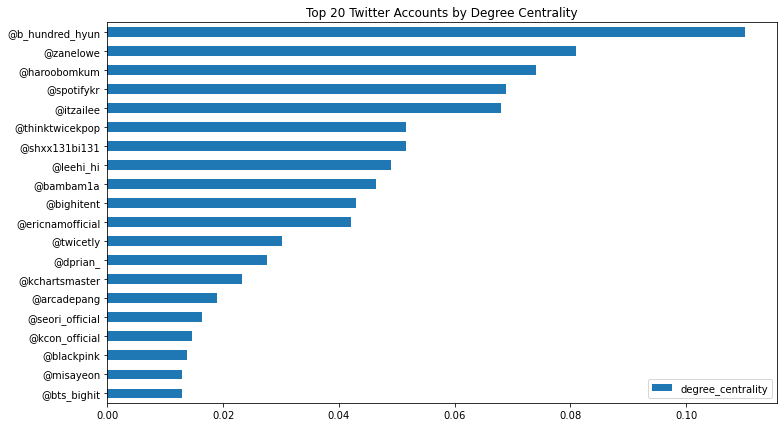

In [21]:
title = 'Top 20 Twitter Accounts by Degree Centrality' 

_= degcent_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

In [22]:
betwcent = nx.betweenness_centrality(G) 

betwcent 

{'@kmg3445t': 0.0,
 '@code_kunst': 0.016037572215773392,
 '@highgrnd': 0.0,
 '@youngjay_93': 0.0,
 '@sobeompark': 0.0,
 '@justhiseung': 0.0,
 '@hwajilla': 0.0,
 '@blobyblo': 0.02836579219003866,
 '@minddonyy': 0.0,
 '@iuiive': 0.0,
 '@wgyenny': 0.0,
 '@wondergirls': 0.0013446180439736057,
 '@wg_lim': 0.0026862711087984274,
 '@eugenius887': 0.0,
 '@tukutz81': 0.0,
 '@krungy21': 0.022526397845298824,
 '@haroobomkum': 0.12178879004965242,
 '@ericjracy': 0.0,
 '@nolza_xxi': 0.0,
 '@ryubae21': 0.0,
 '@rebellebomzi': 0.0,
 '@gyulokpocjinhwa': 0.0,
 '@seungrisoio': 0.0,
 '@made_for_tttops': 0.0,
 '@clprv': 0.0,
 '@twinkle_tisa': 0.0,
 '@haroodidi': 0.0,
 '@jjy82_stop': 0.0,
 '@nokiov': 0.0,
 '@kristinekwaknok': 0.0,
 '@mm_3058': 0.0,
 '@2ne1_chisanokio': 0.0,
 '@izumingkki21': 0.0,
 '@moongyuri': 0.0,
 '@dyana_norazam': 0.0,
 '@maaa21too': 0.0,
 '@wereuniq': 0.0,
 '@bb21konnerakhi': 0.0,
 '@dindaacchan': 0.0,
 '@bomswife': 0.0,
 '@bomshiatus': 0.0,
 '@ftsuhyunouijakn': 0.0,
 '@harooharoobomou

In [23]:
betwcent_df = pd.DataFrame(betwcent, index=[0]).T 
betwcent_df.columns = ['betweenness_centrality'] 
betwcent_df.sort_values('betweenness_centrality', inplace=True, ascending=False) 
betwcent_df.head() 

,betweenness_centrality
@youtube,0.193090
@spotifykr,0.175619
@kchartsmaster,0.167481
@blackpink,0.125805
@haroobomkum,0.121789


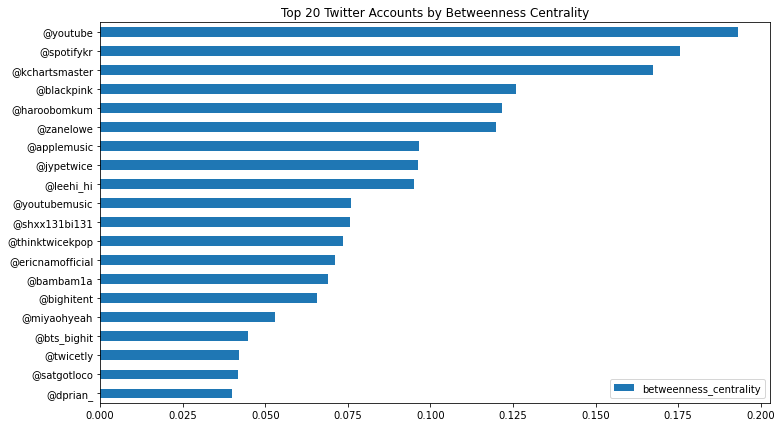

In [24]:
title = 'Top 20 Twitter Accounts by Betweenness Centrality' 

_= betwcent_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

In [25]:
closecent = nx.closeness_centrality(G) 

closecent 

{'@kmg3445t': 0.12710883458078617,
 '@code_kunst': 0.15176930794223495,
 '@highgrnd': 0.12710883458078617,
 '@youngjay_93': 0.12710883458078617,
 '@sobeompark': 0.12710883458078617,
 '@justhiseung': 0.12710883458078617,
 '@hwajilla': 0.12710883458078617,
 '@blobyblo': 0.18711010406907921,
 '@minddonyy': 0.12710883458078617,
 '@iuiive': 0.12710883458078617,
 '@wgyenny': 0.07940034854856182,
 '@wondergirls': 0.08836984862746897,
 '@wg_lim': 0.09959594534390066,
 '@eugenius887': 0.12710883458078617,
 '@tukutz81': 0.12710883458078617,
 '@krungy21': 0.1694177446585359,
 '@haroobomkum': 0.19747328545225393,
 '@ericjracy': 0.1576714476955441,
 '@nolza_xxi': 0.1576714476955441,
 '@ryubae21': 0.1576714476955441,
 '@rebellebomzi': 0.1576714476955441,
 '@gyulokpocjinhwa': 0.1576714476955441,
 '@seungrisoio': 0.1576714476955441,
 '@made_for_tttops': 0.1576714476955441,
 '@clprv': 0.1576714476955441,
 '@twinkle_tisa': 0.1576714476955441,
 '@haroodidi': 0.1576714476955441,
 '@jjy82_stop': 0.15767144

In [26]:
closecent_df = pd.DataFrame(closecent, index=[0]).T 
closecent_df.columns = ['closeness_centrality'] 
closecent_df.sort_values('closeness_centrality', inplace=True, ascending=False) 
closecent_df.head() 

,closeness_centrality
@blackpink,0.247134
@youtube,0.238254
@kchartsmaster,0.230364
@spotifykr,0.229991
@leehi_hi,0.222560


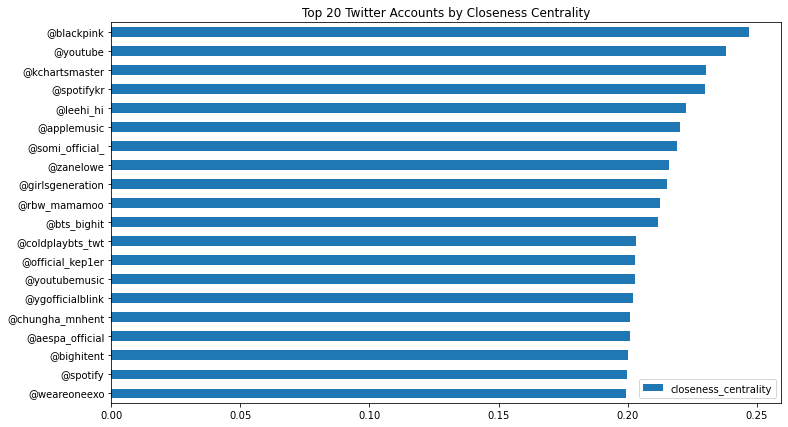

In [27]:
title = 'Top 20 Twitter Accounts by Closeness Centrality' 

_= closecent_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

In [28]:
pagerank = nx.pagerank(G) 

pagerank 

{'@kmg3445t': 0.00047123124840596525,
 '@code_kunst': 0.005226313735064201,
 '@highgrnd': 0.00047123124840596525,
 '@youngjay_93': 0.00047123124840596525,
 '@sobeompark': 0.00047123124840596525,
 '@justhiseung': 0.00047123124840596525,
 '@hwajilla': 0.00047123124840596525,
 '@blobyblo': 0.0014007295303692594,
 '@minddonyy': 0.00047123124840596525,
 '@iuiive': 0.00047123124840596525,
 '@wgyenny': 0.000537226620562695,
 '@wondergirls': 0.0009602692809902633,
 '@wg_lim': 0.0008821436492944235,
 '@eugenius887': 0.00047123124840596525,
 '@tukutz81': 0.00047123124840596525,
 '@krungy21': 0.000789539023636247,
 '@haroobomkum': 0.03374180216354001,
 '@ericjracy': 0.00046314977962107727,
 '@nolza_xxi': 0.00046314977962107727,
 '@ryubae21': 0.00046314977962107727,
 '@rebellebomzi': 0.00046314977962107727,
 '@gyulokpocjinhwa': 0.00046314977962107727,
 '@seungrisoio': 0.00046314977962107727,
 '@made_for_tttops': 0.00046314977962107727,
 '@clprv': 0.00046314977962107727,
 '@twinkle_tisa': 0.0004631

In [29]:
pagerank_df = pd.DataFrame(pagerank, index=[0]).T 
pagerank_df.columns = ['pagerank'] 
pagerank_df.sort_values('pagerank', inplace=True, ascending=False) 
pagerank_df.head() 

,pagerank
@b_hundred_hyun,0.050979
@zanelowe,0.036025
@haroobomkum,0.033742
@itzailee,0.031641
@spotifykr,0.026531


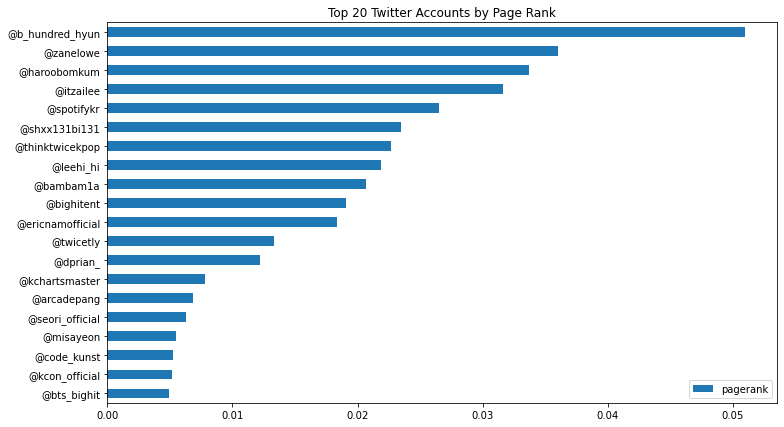

In [30]:
title = 'Top 20 Twitter Accounts by Page Rank' 

_= pagerank_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

# comparing centralities

In [31]:
combined_importance_df = pd.concat([degree_df, degcent_df, betwcent_df, closecent_df, pagerank_df], axis=1) 

combined_importance_df.head(10) 

,degrees,degree_centrality,betweenness_centrality,closeness_centrality,pagerank
@b_hundred_hyun,128,0.110155,0.012050,0.110155,0.050979
@zanelowe,94,0.080895,0.119831,0.216054,0.036025
@haroobomkum,86,0.074010,0.121789,0.197473,0.033742
@spotifykr,80,0.068847,0.175619,0.229991,0.026531
@itzailee,79,0.067986,0.004568,0.067986,0.031641
@thinktwicekpop,60,0.051635,0.073378,0.162288,0.022711
@shxx131bi131,60,0.051635,0.075669,0.165467,0.023469
@leehi_hi,57,0.049053,0.094873,0.222560,0.021838
@bambam1a,54,0.046472,0.068909,0.173223,0.020710
@bighitent,50,0.043029,0.065514,0.200317,0.019042


In [32]:
combined_importance_df.sort_values('pagerank', ascending=False)[0:10] 

,degrees,degree_centrality,betweenness_centrality,closeness_centrality,pagerank
@b_hundred_hyun,128,0.110155,0.012050,0.110155,0.050979
@zanelowe,94,0.080895,0.119831,0.216054,0.036025
@haroobomkum,86,0.074010,0.121789,0.197473,0.033742
@itzailee,79,0.067986,0.004568,0.067986,0.031641
@spotifykr,80,0.068847,0.175619,0.229991,0.026531
@shxx131bi131,60,0.051635,0.075669,0.165467,0.023469
@thinktwicekpop,60,0.051635,0.073378,0.162288,0.022711
@leehi_hi,57,0.049053,0.094873,0.222560,0.021838
@bambam1a,54,0.046472,0.068909,0.173223,0.020710
@bighitent,50,0.043029,0.065514,0.200317,0.019042


# visualizing subgraphs

In [33]:
subgraph_nodes = pagerank_df[0:100].index.to_list() 

subgraph_nodes 

['@b_hundred_hyun',
 '@zanelowe',
 '@haroobomkum',
 '@itzailee',
 '@spotifykr',
 '@shxx131bi131',
 '@thinktwicekpop',
 '@leehi_hi',
 '@bambam1a',
 '@bighitent',
 '@ericnamofficial',
 '@twicetly',
 '@dprian_',
 '@kchartsmaster',
 '@arcadepang',
 '@seori_official',
 '@misayeon',
 '@code_kunst',
 '@kcon_official',
 '@bts_bighit',
 '@yubinofficial',
 '@bts_twt',
 '@miyaohyeah',
 '@blackpink',
 '@satgotloco',
 '@niziu__official',
 '@cube_ptg',
 '@applemusic',
 '@somi_official_',
 '@pledis_17',
 '@jp_dreamcatcher',
 '@got7official',
 '@shinsfriends',
 '@youtube',
 '@weareoneexo',
 '@ygofficialblink',
 '@bvndit_official',
 '@5redvelvet',
 '@yerinbaek',
 '@kpopggsuperior',
 '@official_yoon_',
 '@jaybumaom',
 '@itzyofficial',
 '@ljh__official',
 '@yginnercircle',
 '@spotify',
 '@enhypen',
 '@wjsn_cosmic',
 '@girlsgeneration',
 '@txt_members',
 '@heize_official',
 '@cubeclc',
 '@shfly3424',
 '@ab6ix',
 '@stray_kids',
 '@rbw_mamamoo',
 '@blobyblo',
 '@ateezofficial',
 '@jypetwice',
 '@rvsmtown',


In [34]:
G_sub = G.subgraph(subgraph_nodes) 

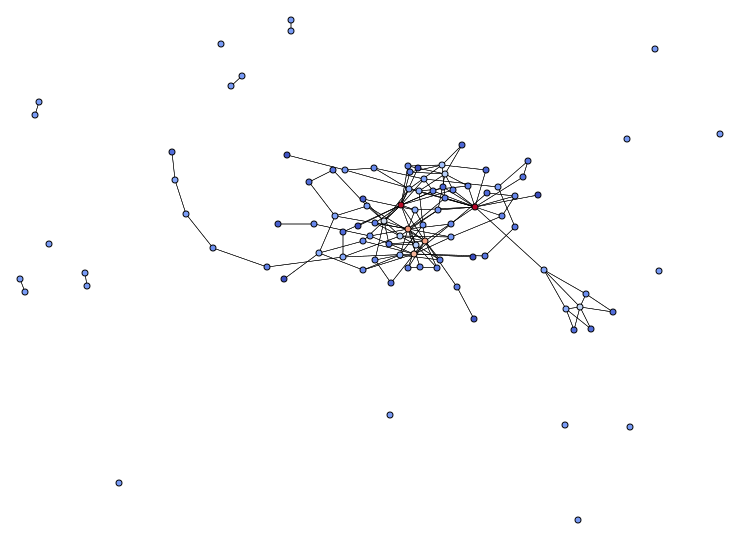

In [35]:
draw_graph(G_sub, node_size=3) 

# connected components

In [36]:
components = list(nx.connected_components(G)) 

len(components) 

15

In [37]:
for i in range(len(components)): 

    component_node_count = len(components[i]) 

    print('component {}: {}'.format(i, component_node_count)) 

component 0: 909
component 1: 2
component 2: 3
component 3: 4
component 4: 2
component 5: 2
component 6: 80
component 7: 129
component 8: 3
component 9: 7
component 10: 4
component 11: 4
component 12: 2
component 13: 10
component 14: 2


In [38]:
def draw_component(G, component, node_size=3, show_names=True): 

    check_component = components[component] 

    G_check = G.subgraph(check_component) 

    return draw_graph(G_check, show_names=show_names, node_size=node_size) 

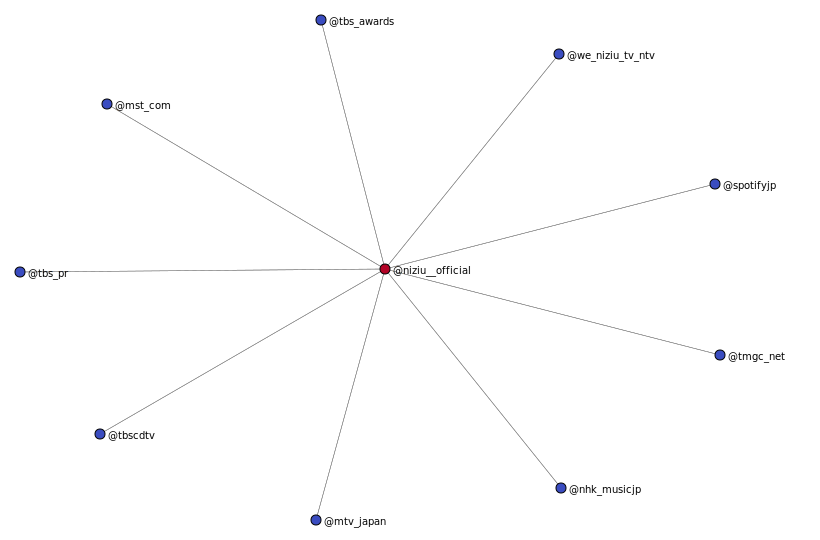

In [39]:
draw_component(G, component=13, node_size=5) 

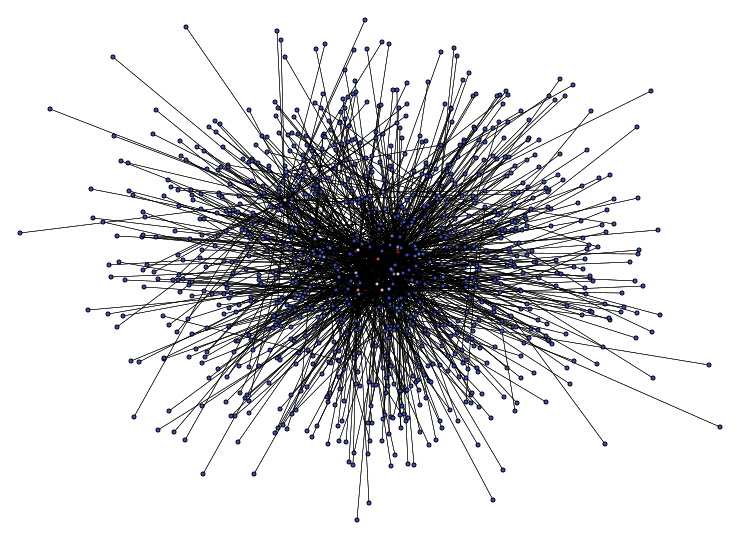

In [40]:
draw_component(G, 0, show_names=False, node_size=2) 

# communities

In [41]:
import community as community_louvain 

In [42]:
def draw_partition(G, partition): 

    import matplotlib.cm as cm 
    import matplotlib.pyplot as plt 

    # draw the graph 
    plt.figure(3,figsize=(12,12)) 
    pos = nx.spring_layout(G) 

    # color the nodes according to their partition 

    cmap = cm.get_cmap('flag', max(partition.values()) + 1) 
    
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=20, cmap=cmap, node_color=list(partition.values())) 
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3) 

    return plt.show() 

In [43]:
partition = community_louvain.best_partition(G, resolution=2) 

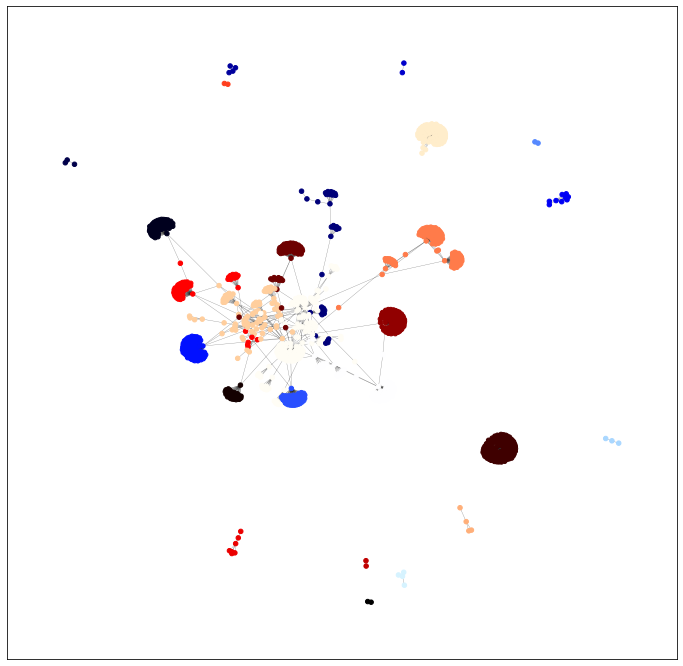

In [44]:
draw_partition(G, partition) 

In [45]:
community_df = pd.DataFrame(partition, index=[0]).T 
community_df.columns = ['community'] 
community_df.head() 

,community
@kmg3445t,0
@code_kunst,0
@highgrnd,0
@youngjay_93,0
@sobeompark,0


In [46]:
community_df['community'].value_counts() 

21    160
14    129
16    104
5      91
23     91
3      85
13     80
2      70
0      66
22     61
17     59
15     55
1      36
6      31
4      10
19      7
10      4
20      4
24      4
18      3
9       3
11      2
8       2
25      2
12      2
7       2
Name: community, dtype: int64

In [47]:
def get_community_nodes(commmunity_df, partition): 

    community_nodes = community_df[community_df['community']==partition].index.to_list() 

    return community_nodes 

In [48]:
def draw_community(G, community_df, partition, node_size=3, show_names=False): 

    community_nodes = get_community_nodes(community_df, partition) 

    G_community = G.subgraph(community_nodes) 

    return draw_graph(G_community, node_size=node_size, show_names=show_names) 

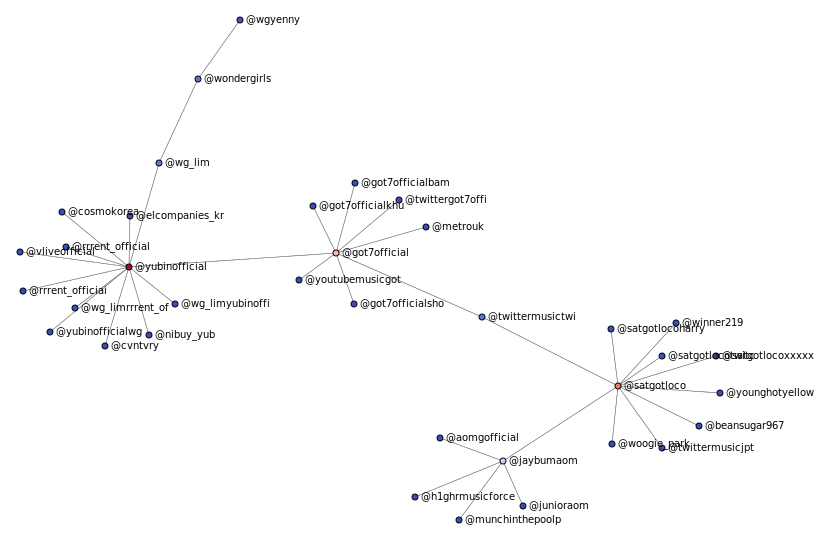

In [49]:
draw_community(G, community_df, 1, show_names=True) # draw community 1

# bridges

In [50]:
list(nx.bridges(G)) 

[('@kmg3445t', '@code_kunst'),
 ('@code_kunst', '@highgrnd'),
 ('@code_kunst', '@youngjay_93'),
 ('@code_kunst', '@sobeompark'),
 ('@code_kunst', '@justhiseung'),
 ('@code_kunst', '@hwajilla'),
 ('@code_kunst', '@blobyblo'),
 ('@code_kunst', '@minddonyy'),
 ('@code_kunst', '@iuiive'),
 ('@code_kunst', '@eugenius887'),
 ('@code_kunst', '@tukutz81'),
 ('@code_kunst', '@migoivtitunes'),
 ('@code_kunst', '@nucksal'),
 ('@wgyenny', '@wondergirls'),
 ('@wondergirls', '@wg_lim'),
 ('@wg_lim', '@yubinofficial'),
 ('@haroobomkum', '@ericjracy'),
 ('@haroobomkum', '@nolza_xxi'),
 ('@haroobomkum', '@ryubae21'),
 ('@haroobomkum', '@rebellebomzi'),
 ('@haroobomkum', '@gyulokpocjinhwa'),
 ('@haroobomkum', '@seungrisoio'),
 ('@haroobomkum', '@made_for_tttops'),
 ('@haroobomkum', '@clprv'),
 ('@haroobomkum', '@twinkle_tisa'),
 ('@haroobomkum', '@haroodidi'),
 ('@haroobomkum', '@jjy82_stop'),
 ('@haroobomkum', '@nokiov'),
 ('@haroobomkum', '@kristinekwaknok'),
 ('@haroobomkum', '@mm_3058'),
 ('@haroobo

In [51]:
bridges = [s[0] for s in list(nx.bridges(G))] 

pd.Series(bridges).value_counts()[0:10] 

@b_hundred_hyun    127
@zanelowe           90
@haroobomkum        84
@itzailee           78
@spotifykr          60
@shxx131bi131       57
@leehi_hi           53
@thinktwicekpop     53
@bambam1a           49
@bighitent          46
dtype: int64

In [52]:
cut_bridges = pd.Series(bridges).value_counts()[0:10].index.to_list() 

G_bridge_cut = G.copy() 
G_bridge_cut.remove_nodes_from(cut_bridges) 

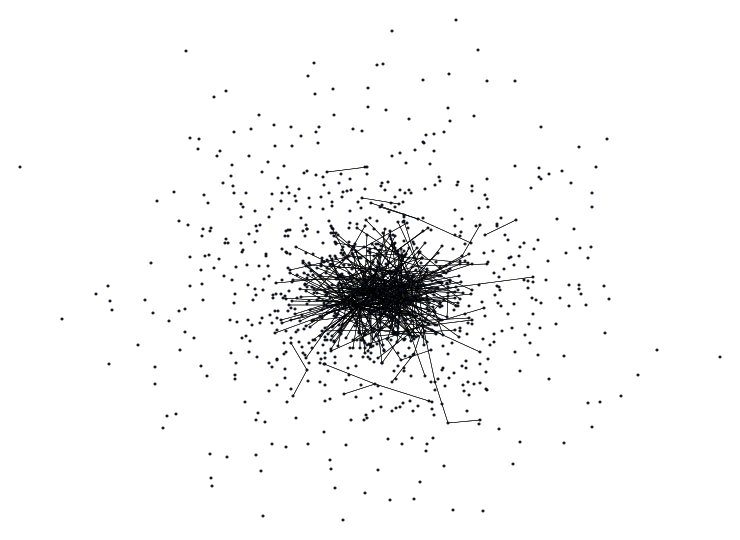

In [53]:
draw_graph(G_bridge_cut, show_names=False) 

# layers: k-core and k-corona

In [54]:
G_core = nx.k_core(G, 2) # k-core

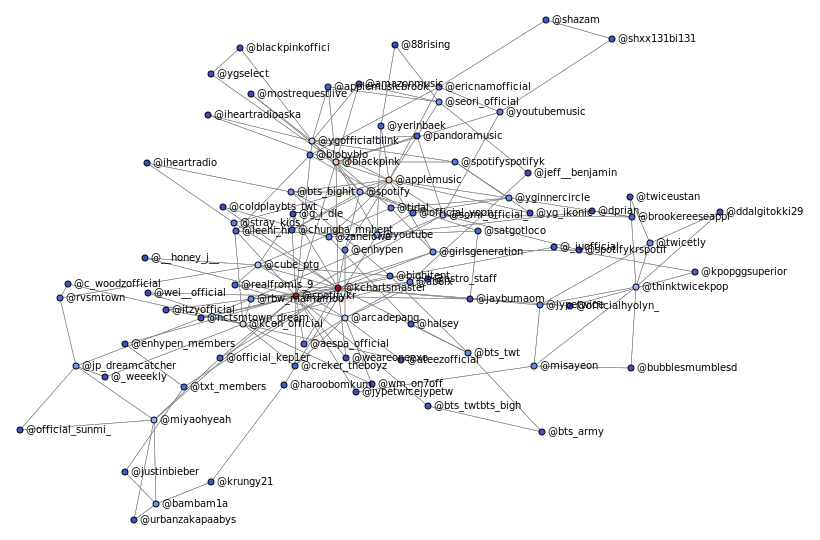

In [55]:
draw_graph(G_core, show_names=True, node_size=3) 

In [56]:
G_corona = nx.k_corona(G, 1) # k-corona

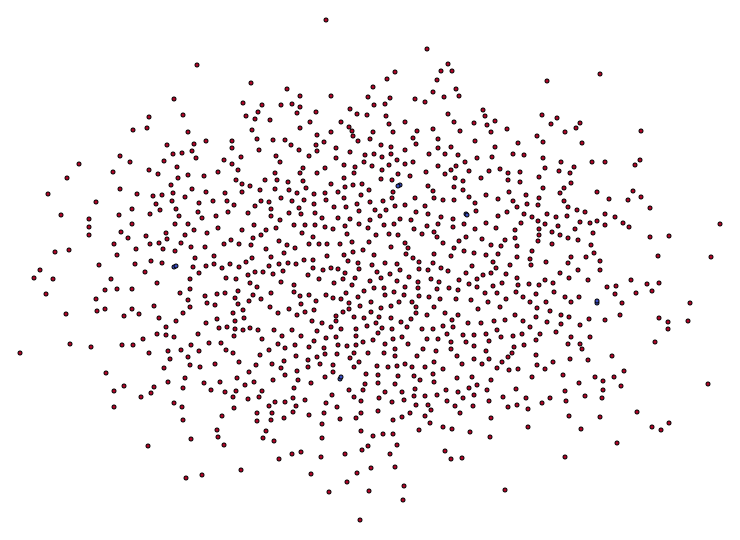

In [57]:
draw_graph(G_corona, show_names=False, node_size=2) 

In [58]:
G_corona = nx.k_corona(G, 1) 

G_corona = nx.k_core(G_corona, 1) 

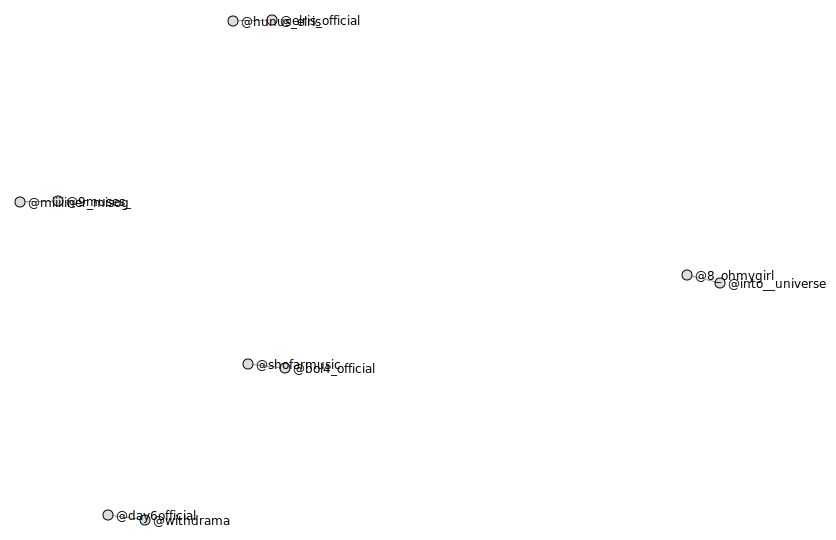

In [59]:
draw_graph(G_corona, show_names=True, node_size=5, font_size=12) 

In [60]:
corona_nodes = list(G_corona.nodes) 

corona_nodes  

['@into__universe',
 '@shofarmusic',
 '@day6official',
 '@8_ohmygirl',
 '@hunus_elris',
 '@9muses_',
 '@elris_official',
 '@bol4_official',
 '@miiiiiner_misog',
 '@withdrama']

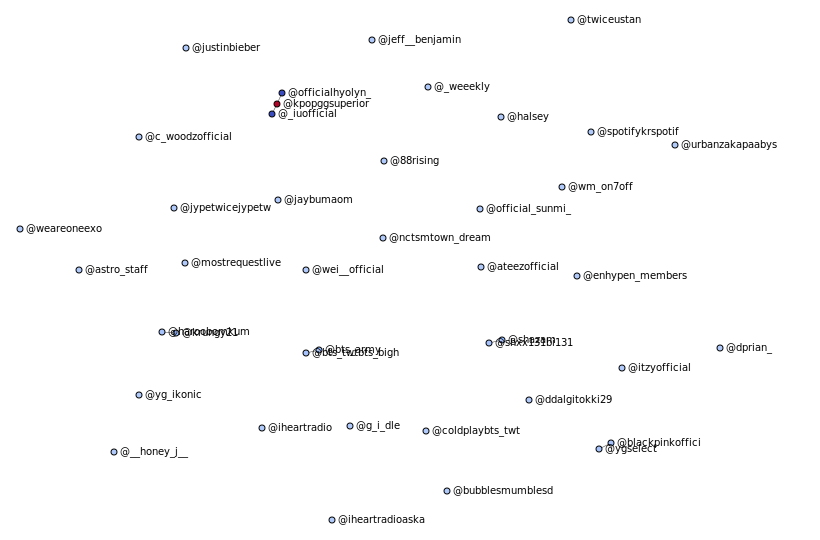

In [61]:
G_corona = nx.k_corona(G, 2) 

draw_graph(G_corona, show_names=True, node_size=3) 